<a href="https://colab.research.google.com/github/RamsesSs/flaskTest/blob/master/numberTest_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


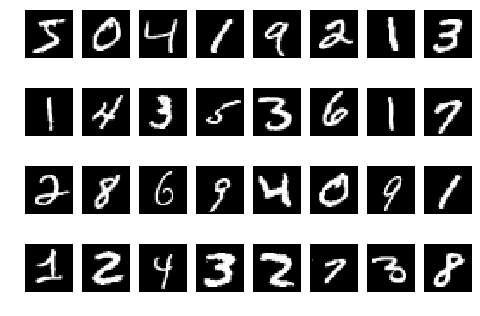

In [0]:
for i in range(0, 32):
  plt.subplot(4, 8, i + 1)
  plt.axis("off")
  plt.imshow(x_train[i], cmap="gray")

In [0]:
x_train = x_train.reshape(-1,784).astype("float32") / 255
x_test = x_test.reshape(-1,784).astype("float32") / 255
y_train = keras.utils.np_utils.to_categorical(y_train.astype("int32"),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype("int32"), 10)

In [0]:
in_size = 28 * 28
out_size = 10
Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(512, activation="relu", input_shape=(in_size,)))
model.add(Dense(out_size, activation="softmax"))

In [0]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

In [0]:
model.fit(x_train, y_train,
          batch_size=20, epochs=20)

In [0]:
score = model.evaluate(x_test, y_test, verbose=1)
print("正解率：=", score[1], "loss:=", score[0])

In [0]:
model.save_weights("mnist-weight.h5")

In [0]:
clf = joblib.load("digits.pkl")

In [0]:
from google.colab import files
uploaded = files.upload()

上の実行後にファイルをアップロードするボタンが出るので、そこに画像データを上げる

In [0]:
import numpy as np
import cv2

In [0]:
def predict_digit(filename):
  model.load_weights("mnist-weight.h5")
  my_img = cv2.imread(filename)
  my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
  my_img = cv2.resize(my_img, (28, 28))
  #plt.imshow("my_img")
  my_img = 15 - my_img //16
  my_img = my_img.reshape((-1,784))
  res = model.predict(np.array(my_img), batch_size=20)
  return res.argmax()

In [0]:
n = predict_digit("sketch-1548409344886.png")

In [0]:
print("sketch-1548409344886.png = " + str(n))

sketch-1548409344886.png = 6
